This jupyter notebook is used to test and see what the raw segmentation files look like!


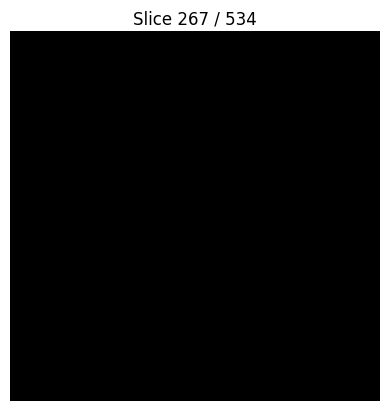

In [6]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

image_path = "../data/raw/segmentation-3.nii"
img = sitk.ReadImage(image_path)
arr = sitk.GetArrayFromImage(img)

# Show image depending on dimensionality
if arr.ndim == 2:
    plt.imshow(arr, cmap='gray')
    plt.title("2D Image")
elif arr.ndim == 3:
    mid = arr.shape[0] // 2
    plt.imshow(arr[mid], cmap='gray')
    plt.title(f"Slice {mid} / {arr.shape[0]}")
else:
    raise ValueError("Unsupported image dimensions.")

plt.axis('off')
plt.show()


In [7]:
print("Shape:", arr.shape)
print("Data type:", arr.dtype)
print("Min:", arr.min())
print("Max:", arr.max())


Shape: (534, 512, 512)
Data type: uint8
Min: 0
Max: 2


realised i ran the wrong thing, trying again


Image shape: (75, 512, 512)
Image range: -3024.0 to 1410.0
Mask unique values: [0 1 2]
Unique mask values in this slice: [0]


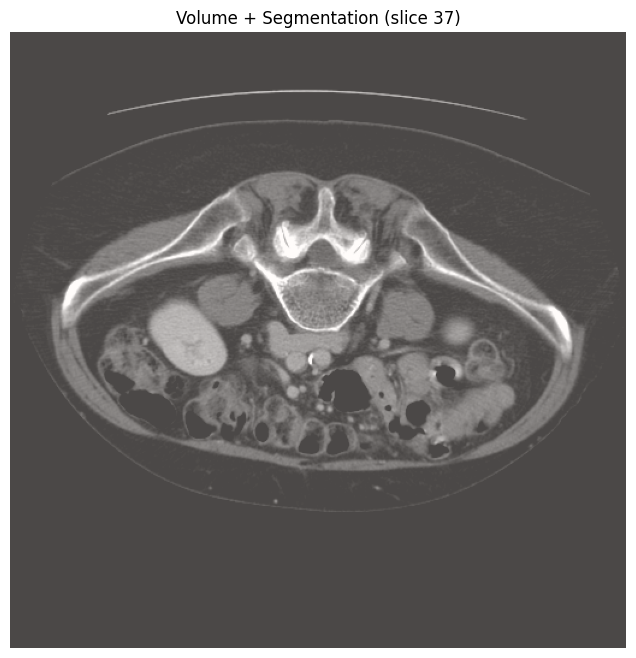

In [9]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Update these paths to match your dataset structure
image_path = "../data/raw/volume-0.nii"
mask_path = "../data/raw_masks/segmentation-0.nii"

# Load image and mask
img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

print("Image shape:", img_arr.shape)
print("Image range:", img_arr.min(), "to", img_arr.max())
print("Mask unique values:", np.unique(mask_arr))

# Normalize CT for display (clip HU values)
def normalize_ct(arr, clip_range=(-100, 400)):
    clipped = np.clip(arr, *clip_range)
    return (clipped - clip_range[0]) / (clip_range[1] - clip_range[0])

norm_img = normalize_ct(img_arr)

# Choose a middle slice that contains tumor (you can adjust index manually)
slice_index = img_arr.shape[0] // 2
print("Unique mask values in this slice:", np.unique(mask_arr[slice_index]))

# Plot image with overlay
plt.figure(figsize=(8, 8))
plt.imshow(norm_img[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"Volume + Segmentation (slice {slice_index})")
plt.axis('off')
plt.show()


there is no unqiue mask values in this slice, hecne we need to find another slice, so we will run the following code

for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        print(f"First non-empty mask found at slice {i}")
        break
slice_index = i


Found labeled slice at index 45
Mask values: [0 1]


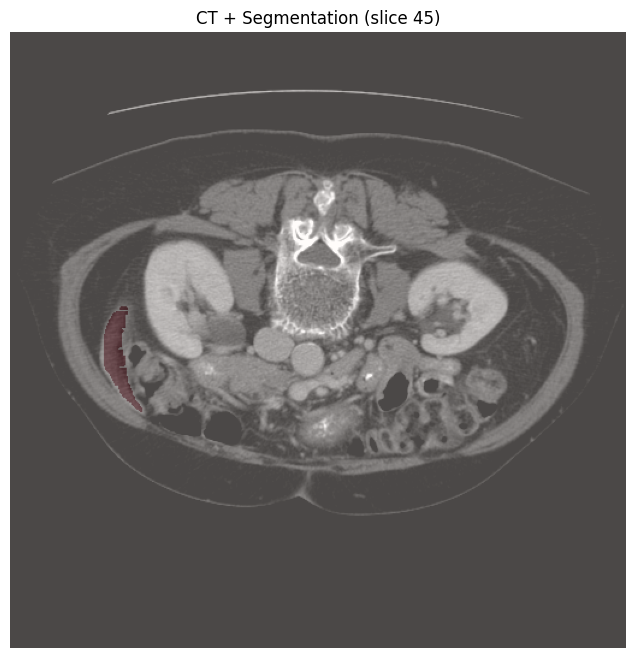

In [10]:
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

# Load CT and mask
image_path = "../data/raw/volume-0.nii"
mask_path = "../data/raw_masks/segmentation-0.nii"

img = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

img_arr = sitk.GetArrayFromImage(img)
mask_arr = sitk.GetArrayFromImage(mask)

# Normalize CT for display
def normalize_ct(arr, clip_range=(-100, 400)):
    arr = np.clip(arr, *clip_range)
    return (arr - clip_range[0]) / (clip_range[1] - clip_range[0])

norm_img = normalize_ct(img_arr)

# Find first slice with labels in the mask
for i in range(mask_arr.shape[0]):
    if np.any(mask_arr[i] > 0):
        slice_index = i
        print(f"Found labeled slice at index {slice_index}")
        print("Mask values:", np.unique(mask_arr[slice_index]))
        break
else:
    raise ValueError("No labeled slices found in this volume.")

# Plot that slice
plt.figure(figsize=(8, 8))
plt.imshow(norm_img[slice_index], cmap='gray')
plt.imshow(mask_arr[slice_index], cmap='Reds', alpha=0.3)
plt.title(f"CT + Segmentation (slice {slice_index})")
plt.axis('off')
plt.show()


okay mask is found, but what is that

mask value is 0 and 1, which is background and liver respectvely, so that is supposedly a liver
